In [5]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

import numpy as np

from dotenv import load_dotenv
load_dotenv()

%load_ext autoreload
%autoreload 2
from library import hello_world, fetch_all_games, filter_rapid, build_rating_frame

USERNAME = os.environ.get("USERNAME")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
rapid_games = filter_rapid(fetch_all_games(USERNAME))

In [7]:
df = build_rating_frame(rapid_games, USERNAME)

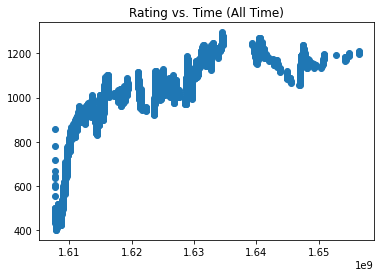

In [8]:
fig, ax = plt.subplots()

ax.scatter(df["Date"], df["Rating"])
plt.title("Rating vs. Time (All Time)")
plt.show()

### X-Ticks

In [10]:
from datetime import datetime

In [12]:
start = datetime.fromtimestamp(min(df["Date"]))
end = datetime.fromtimestamp(max(df["Date"]))

cursor = start

ticks = []
labels = []

while cursor < end:
    ticks.append(int(cursor.timestamp()))
    labels.append(cursor.strftime("%b %Y"))
    if cursor.month == 12:
        cursor = cursor.replace(year=cursor.year + 1, month=1)
    else:
        cursor = cursor.replace(month=cursor.month + 1)


In [13]:
ticks

[1607644800,
 1610323200,
 1613001600,
 1615420800,
 1618095600,
 1620687600,
 1623366000,
 1625958000,
 1628636400,
 1631314800,
 1633906800,
 1636588800,
 1639180800,
 1641859200,
 1644537600,
 1646956800,
 1649631600,
 1652223600,
 1654902000]

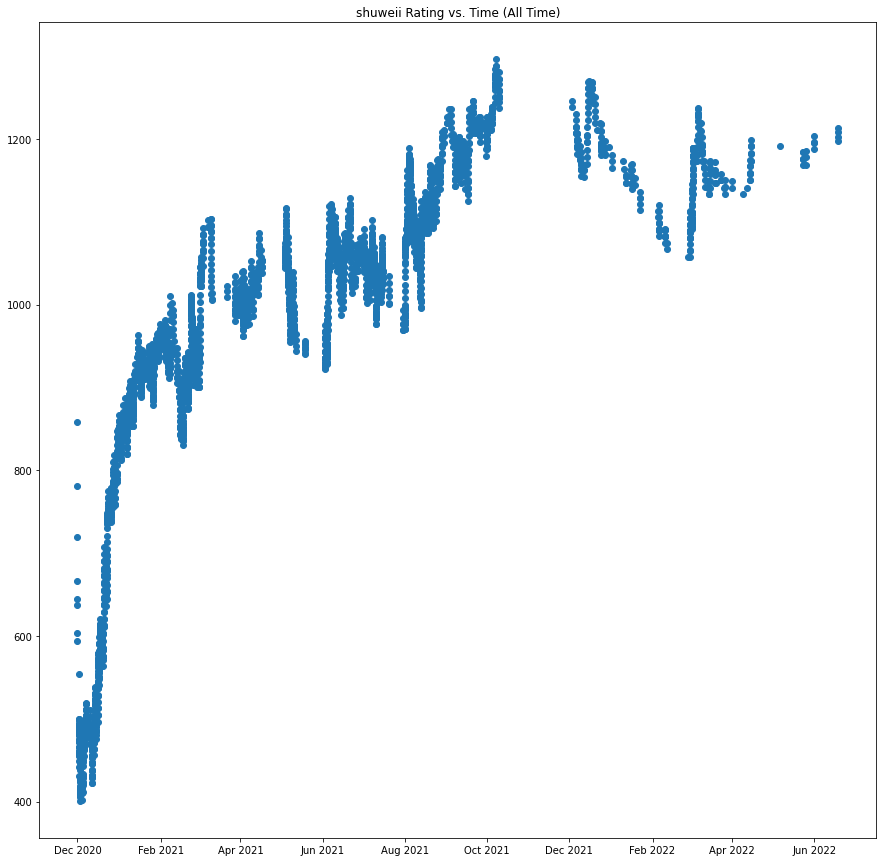

In [16]:
fig, ax = plt.subplots()

ax.scatter(df["Date"], df["Rating"])
plt.title(f"{USERNAME} Rating vs. Time (All Time)")
plt.xticks(ticks[::2], labels[::2])
fig.set_size_inches((15,15))
plt.show()

In [19]:
df.describe()

,Rating,Date
count,3746.000000,3.746000e+03
mean,973.563267,1.622165e+09
std,194.669004,1.068409e+07
min,401.000000,1.607645e+09
25%,917.000000,1.612742e+09
50%,1021.000000,1.621469e+09
75%,1094.000000,1.629158e+09
max,1296.000000,1.656461e+09


In [22]:
from datetime import datetime, timedelta
delta = min(df[df["Rating"] >= 1296]["Date"]) - min(df["Date"])
delta_datetime = timedelta(seconds=delta)
delta_datetime

datetime.timedelta(days=311)